# Task 1: Retrieving and Preparing the Data

In [1]:
#   imports
import pandas as pd
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Data Cleaning and checking

### Overall data checking

In [3]:
HFCR.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
#  quick look at the format of the data
HFCR.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
HFCR.dtypes # Get data type for each column & verify they are correct

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# check entire dataset for None types, empty strings, or the NumPy type NaN
missing = False
for feature in HFCR:
    for data in feature:
        if data is None or data == '' or data == np.NaN:
            missing = True
if missing:
    print("There are missing values")
else:
    print("There are no missing values")

There are no missing values


### Age

In [7]:
min_age = HFCR["age"].min()
max_age = HFCR["age"].max()
print ("The youngest patient is aged: ", min_age)
print ("The oldest patient is aged: ", max_age)

The youngest patient is aged:  40.0
The oldest patient is aged:  95.0


There are no impossible values in this column since the minimum age surveyed is 40, and the oldest is 95.

### Anaemia

In [8]:
min_ana = HFCR["anaemia"].min()
max_ana = HFCR["anaemia"].max()
print ("The lowest value: ", min_ana)
print ("The highest value: ", max_ana)

The lowest value:  0
The highest value:  1


In [9]:
Error = False
for HFCR["anaemia"] in HFCR:
    for data in HFCR["anaemia"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


By checking the anaemia with using min / max as well as a for loop, we can conclude there are no values other than 0 or
1, which means there are no errors in these boolean values.

### Creatinine Phosphokinase

In [10]:
min_CPK = HFCR["creatinine_phosphokinase"].min()
max_CPK = HFCR["creatinine_phosphokinase"].max()
print ("The lowest value: ", min_CPK)
print ("The highest value: ", max_CPK)

# looking at the IQR of creatinine phosphokinase
Q1 = HFCR["creatinine_phosphokinase"].quantile(0.25)
Q3 = HFCR["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  23
The highest value:  7861
The IQR is: 465.5
The lower outlier threshold is -581.75 and the upper outlier threshold is 1280.25.


Text(0, 0.5, 'CPK Enzyme (mcg/L')

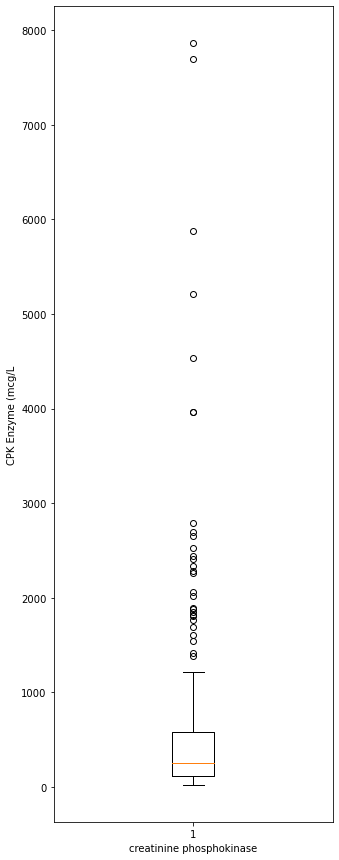

In [11]:

fig = plt.figure(figsize =(5, 15))
plt.boxplot(HFCR["creatinine_phosphokinase"])
plt.xlabel('creatinine phosphokinase')
plt.ylabel('CPK Enzyme (mcg/L')

There appear to be a number of outliers for the level of the CPK enzyme in the blood.

### Diabetes

In [12]:
min_diabetes = HFCR["diabetes"].min()
max_diabetes = HFCR["diabetes"].max()
print ("The lowest value: ", min_diabetes)
print ("The highest value: ", max_diabetes)

The lowest value:  0
The highest value:  1


In [13]:
Error = False
for HFCR["diabetes"] in HFCR:
    for data in HFCR["diabetes"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the anaemia column.

### Ejection fraction

In [14]:
min_EJ = HFCR["ejection_fraction"].min()
max_EJ = HFCR["ejection_fraction"].max()
print ("The lowest value: ", min_EJ)
print ("The highest value: ", max_EJ)

# looking at the IQR of ejection fraction
Q1 = HFCR["ejection_fraction"].quantile(0.25)
Q3 = HFCR["ejection_fraction"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  14
The highest value:  80
The lower outlier threshold is 7.5 and the upper outlier threshold is 67.5.


In [15]:
print("Values over 67: ")
HFCR[['ejection_fraction']][HFCR.ejection_fraction > 67]

Values over 67: 


,ejection_fraction
64,80
217,70


Outliers with over 67% ejection fraction has been found at row 64 and 217 of the dataset.

### High Blood Pressure

In [16]:
min_HBP = HFCR["high_blood_pressure"].min()
max_HBP = HFCR["high_blood_pressure"].max()
print ("The lowest value: ", min_HBP)
print ("The highest value: ", max_HBP)

The lowest value:  0
The highest value:  1


In [17]:
for HFCR["high_blood_pressure"] in HFCR:
    for data in HFCR["high_blood_pressure"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the High Blood Pressure column.

### Platelets

In [18]:
min_platelets = HFCR["platelets"].min()
max_platelets = HFCR["platelets"].max()
print ("The lowest value: ", min_platelets)
print ("The highest value: ", max_platelets)

# looking at the IQR of platelets
Q1 = HFCR["platelets"].quantile(0.25)
Q3 = HFCR["platelets"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  25100.0
The highest value:  850000.0
The lower outlier threshold is 76000.0 and the upper outlier threshold is 440000.0.


In [19]:
print("Values below 76000: ")
HFCR[['platelets']][HFCR.platelets < 76000]

Values below 76000: 


,platelets
15,47000.0
163,75000.0
167,70000.0
200,73000.0
230,62000.0
277,25100.0
281,51000.0


In [20]:
print("Values over 440000: ")
HFCR[['platelets']][HFCR.platelets > 440000]

Values over 440000: 


,platelets
7,454000.0
47,451000.0
55,461000.0
69,497000.0
105,621000.0
109,850000.0
117,507000.0
162,448000.0
212,481000.0
224,504000.0


A number of outliers have been found for the Platelets column.

### Serum Creatinine

In [21]:
min_SC = HFCR["serum_creatinine"].min()
max_SC = HFCR["serum_creatinine"].max()
print ("The lowest value: ", min_SC)
print ("The highest value: ", max_SC)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["serum_creatinine"].quantile(0.25)
Q3 = HFCR["serum_creatinine"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  0.5
The highest value:  9.4
The lower outlier threshold is 0.15000000000000024 and the upper outlier threshold is 2.1499999999999995.


In [22]:
print("Values above 2.1499999999999995: ")
HFCR[['serum_creatinine']][HFCR.serum_creatinine > 2.1499999999999995]

Values above 2.1499999999999995: 


,serum_creatinine
4,2.7
9,9.4
10,4.0
28,5.8
31,3.0
35,3.5
38,2.3
39,3.0
48,4.4
52,6.8


### Serum Sodium

In [23]:
min_SS = HFCR["serum_sodium"].min()
max_SS = HFCR["serum_sodium"].max()
print ("The lowest value: ", min_SS)
print ("The highest value: ", max_SS)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["serum_sodium"].quantile(0.25)
Q3 = HFCR["serum_sodium"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  113
The highest value:  148
The lower outlier threshold is 125.0 and the upper outlier threshold is 149.0.


In [24]:
print("Values below 125: ")
HFCR[['serum_sodium']][HFCR.serum_sodium < 125]

Values below 125: 


,serum_sodium
4,116
19,121
126,124
199,113


Here, we can see 4 outliers for the Serum Sodium column.

### Sex

In [25]:
min_S = HFCR["sex"].min()
max_S = HFCR["sex"].max()
print ("The lowest value: ", min_S)
print ("The highest value: ", max_S)

The lowest value:  0
The highest value:  1


In [26]:
for HFCR["sex"] in HFCR:
    for data in HFCR["sex"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the binary values in the Sex column.

### Smoking

In [27]:
min_Smoke = HFCR["smoking"].min()
max_Smoke = HFCR["smoking"].max()
print ("The lowest value: ", min_Smoke)
print ("The highest value: ", max_Smoke)

The lowest value:  0
The highest value:  1


In [28]:
for HFCR["smoking"] in HFCR:
    for data in HFCR["smoking"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the Smoking column.

### Time

In [29]:

min_T = HFCR["time"].min()
max_T = HFCR["time"].max()
print ("The lowest value: ", min_T)
print ("The highest value: ", max_T)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["time"].quantile(0.25)
Q3 = HFCR["time"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  4
The highest value:  285
The lower outlier threshold is -122.0 and the upper outlier threshold is 398.0.


All values for Time falls within the IQR and there are no outliers.

### Death Event

In [30]:
min_DE = HFCR["DEATH_EVENT"].min()
max_DE = HFCR["DEATH_EVENT"].max()
print ("The lowest value: ", min_DE)
print ("The highest value: ", max_DE)

The lowest value:  0
The highest value:  1


In [31]:
for HFCR["DEATH_EVENT"] in HFCR:
    for data in HFCR["DEATH_EVENT"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the DEATH EVENT column.

### Statement on Data checking section
Whilst many columns had outliers based of the IQR of that column, we have decided to not touch those values as they
are likely accurate and may represent or indicate some kind of illness or symptom is present. It will be better for
someone with knowledge in medical research or conditions to confirm this.

# Task 2: Data Exploration

## 2.1 Exploring each column
### Age

In [32]:
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Q1 = HFCR["age"].quantile(0.25)
Q3 = HFCR["age"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The IQR is: 19.0
The lower outlier threshold is 22.5 and the upper outlier threshold is 98.5.


From here, we can see that age is very spread out. However, all patients surveyed are older than 40 and no older than 95.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


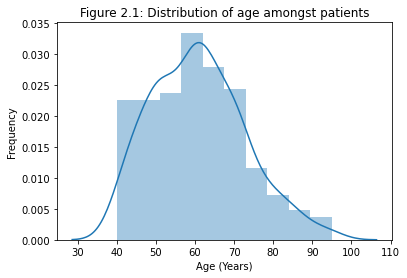

In [39]:
sns.distplot(HFCR["age"], kde=True).set(title=
    "Figure 2.1: Distribution of age amongst patients", xlabel="Age (Years)", ylabel="Frequency")
plt.show;

This graph shows that there is a larger number of younger patients surveyed, evident by right-skewness on the graph.

### Anaemia

In [34]:
HFCR['anaemia'].value_counts()
print("Using this line of code, we can see that 170 patients do not have anaemia whilst 129 does have anaemia")

Using this line of code, we can see that 170 patients do not have anaemia whilst 129 does have anaemia


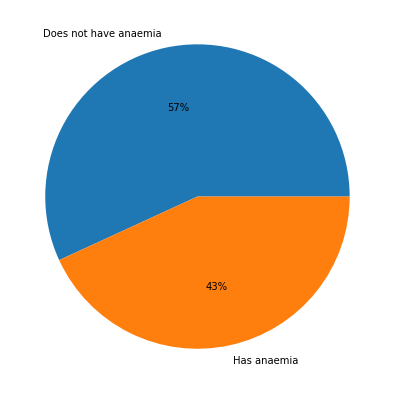

In [35]:
Status = ['Does not have anaemia', 'Has anaemia']
data = [170, 129]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.show()

As we can see here, 43% of patients with anaemia.

### Creatinine Phosphokinase

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


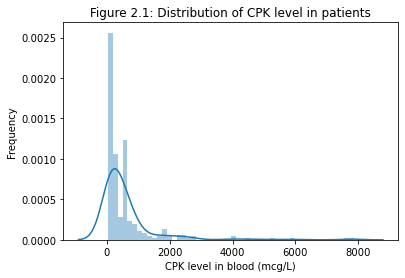

In [36]:
sns.distplot(HFCR["creatinine_phosphokinase"], kde=True).set(title=
    "Figure 2.1: Distribution of CPK level in patients", xlabel="CPK level in blood (mcg/L)", ylabel="Frequency")
plt.show;

As observed here, the majority of patients have a CPK level centered around 465.5mcg/L. Values higher than the upper
outlier threshold of 1280.25 could indicate the patient has underlying health issues or symptoms.

### diabetes

### Ejection fraction

### High blood pressure

### platelets

### Serum creatinine

### Serum sodium

### Sex

### Smoking

### Time

### DEATH EVENT

# Task 3: Data Modelling

In [38]:
#   do stuff here